In [1]:
# Import libraries
import numpy as np
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
from skimage.color import rgb2gray
from PIL import Image

# Create Custom Reflectance, Emissivity and Temperature Maps

You will want to normalize the image so that it is not too bright or dark for the background. Typically use clouds and water as reflectance reference marks.
Once your csv is ready, use a following environment variables as described here to use this as part of your EOIR analysis: https://agi.widen.net/view/pdf/jmsipyrzza/Using-Texture-Maps-in-STKs-EOIR-Tool?t.download=true&x.share=true&x.portal_shortcode_generated=zayjeqv3&x.app=portals 
* AGI_EOIR_CUSTOM_REFLECTANCE_TEXTURE_COORDINATES
* AGI_EOIR_CUSTOM_REFLECTANCE_TEXTURE_FILE
* AGI_EOIR_CUSTOM_EMISSIVITY_TEXTURE_COORDINATES
* AGI_EOIR_CUSTOM_EMISSIVITY_TEXTURE_FILE
* AGI_EOIR_CUSTOM_TEMPERATURE_TEXTURE_COORDINATES
* AGI_EOIR_CUSTOM_TEMPERATURE_TEXTURE_FILE


In [2]:
# Inputs
imageName = r"Test.csv"
darkestReflectance = 0.0 
brightestReflectance = 0.95
lowestTemperature = 263 
highestTemperature = 283

In [3]:
# Create Reflectance map 
data = np.loadtxt(imageName,delimiter=',')
slope = (brightestReflectance-darkestReflectance)/(np.max(data)-np.min(data))
offset = brightestReflectance-slope*np.max(data)
image = slope*data+offset
plt.imshow(image,cmap='gray')
np.savetxt(imageName.split('.')[0]+'Reflectance.csv',image, delimiter=",")

In [4]:
# Emissivity, scaled from 0 to 1 first
reflectance0To1 = image-np.min(image)
reflectance0To1 = reflectance0To1/np.max(reflectance0To1)
emissivity = 1-(reflectance0To1)
np.savetxt(imageName.split('.')[0]+'Emissivity.csv', emissivity, delimiter=",")

# Temperature
temperatures = lowestTemperature+emissivity*(highestTemperature-lowestTemperature)
np.savetxt(imageName.split('.')[0]+'Temperature.csv', temperatures, delimiter=",")
print(np.min(temperatures),np.max(temperatures))
plt.imshow(temperatures,cmap='gray')

## Example Resizing Global Images

In [5]:
# Inputs
imageName = r"GlobalImage.jpg"
scaleFactor = 2 # Affects the final image size
darkestReflectance = 0.0 
brightestReflectance = 1.0
lowestTemperature = 263 
highestTemperature = 283

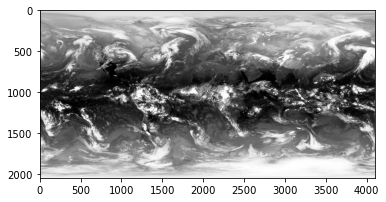

In [6]:
imagePIL = Image.open(imageName).resize((int(8192/scaleFactor),int(4096/scaleFactor))).convert('L')
data = np.array(imagePIL)/255
slope = (brightestReflectance-darkestReflectance)/(np.max(data)-np.min(data))
offset = brightestReflectance-slope*np.max(data)
image = slope*data+offset
plt.imshow(image,cmap='gray')
np.savetxt(imageName.split('.')[0]+'Reflectance.csv',image, delimiter=",")

In [10]:
# Example Combining Images
# imageName = r"EarthMap.png"
# imagePIL = Image.open(imageName).resize((int(8192/scaleFactor),int(4096/scaleFactor))).convert('L')
# data = np.array(imagePIL)/255
# slope = (brightestReflectance-darkestReflectance)/(np.max(data)-np.min(data))
# offset = brightestReflectance-slope*np.max(data)
# image1 = slope*data+offset
# combinedImage = image+(1-image)*image1
# image = combinedImage
# np.savetxt(imageName.split('.')[0]+'Reflectance.csv',image, delimiter=",")

263.0 283.0


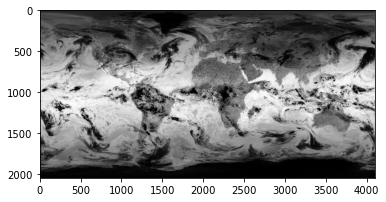

In [11]:
# Save reduced PNG
imagePNG = Image.fromarray(np.uint8(image*255))
imagePNG.save(imageName.split('.')[0]+'.png')

# Save emissivity map  e = (1-reflectance), which is good for optical, just use e for long wave infrared
reflectance0To1 = image-np.min(image)
reflectance0To1 = reflectance0To1/np.max(reflectance0To1)
emissivity = 1-(reflectance0To1)
np.savetxt(imageName.split('.')[0]+'Emissivity.csv', emissivity, delimiter=",")

# Temperature
temperatures = lowestTemperature+emissivity*(highestTemperature-lowestTemperature)
np.savetxt(imageName.split('.')[0]+'Temperature.csv', temperatures, delimiter=",")
print(np.min(temperatures),np.max(temperatures))
plt.imshow(temperatures,cmap='gray')